# Week 4 - Partial Least Squares Regression

We will reimplement and then explore some of the properties of [Cosgrove et al](http://pubs.rsc.org/en/Content/ArticleLanding/2010/MB/b926287c).

In [7]:
import scipy as sp, numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import resample
from sklearn.preprocessing import scale, StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import LeaveOneGroupOut, LeaveOneOut
import matplotlib.pyplot as plt
from scipy.io import loadmat


data = loadmat('wk4_Cosgrove-data.mat', squeeze_me=True)['s']

X = data['X'].item() # the untransformed data matrix (66x102)
Y = data['Y'].item() # the untransformed LDH release at 48hours. (66x1)
phosphoproteins = data['phosphoproteins'].item() # names of phosphoproteins
conditions = data['conditions'].item() # cell array of the 66 conditions
drugList = data['drugList'].item() # description of the drugs used in each of the 66 conditions
drugListToxic = data['drugListToxic'].item() # binary value corresponding to whether drugList[i] is toxic
drugs = data['drugs'].item() # binary matrix mapping which measurements correspond to a drug treatment in drugList
cytokineList = data['cytokineList'].item() # cell array of cytokine treatments
ind4pProtein = data['ind4pProtein'].item() # the column indices corresponding to measurements of the 4 phosphoprotein subset

#### (1) Perform PLSR on the matrixes X and Y. Plot the percent variance explained. How many principal components do you need for each to explain 90% of the Y variance? Discuss your findings.

Hint: Be sure you are normalizing each dataset as needed for the analysis.

6
6


Text(0, 0.5, 'R2Y Over Time')

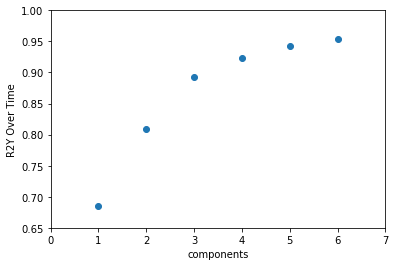

In [8]:
# Answer
from scipy import stats
Y1 = Y[:,4]

Y1 = scale(Y1)
scaler = StandardScaler()




y = []
r2y = 0
n = 1

while(r2y <0.95):
    plsr = PLSRegression(n_components = n)
    fit = plsr.fit_transform(X1,Y1)
    r2y = plsr.score(X1,Y1)
    y.append(r2y)
    n+=1

x = list(range(1,1+ len(y)))
print(len(x))
print(len(y))
plt.scatter(x,y)
plt.xlim(0,7)
plt.ylim(0.65,1)
plt.xlabel('components')
plt.ylabel('R2y');
plt.ylabel('R2Y Over Time')

# print(plsr.x_scores)
# y = plsr.predict(X)

We need 4 principal components to explain over 90% of the Y variance.

#### (2) How would you expect the percent of X variance explained to compare between PLSR and PCA? Why?

Answer. PLSR takes X and Y into account whereas PCA only takes X into account. So PCA, focusing on variance, would probably be able to explain a higher percent than PLSR which considers covariance

#### (3) Recreate the Figure S2A plot from Cosgrove et al. supplementary information. This is the PLSR scores plot (for PC1 and PC2), with toxic drugs colored according to the drug type and all other drugs are not colored. Use the drugList, drugListToxic to identify these categories.

(66, 4)
(66, 4)


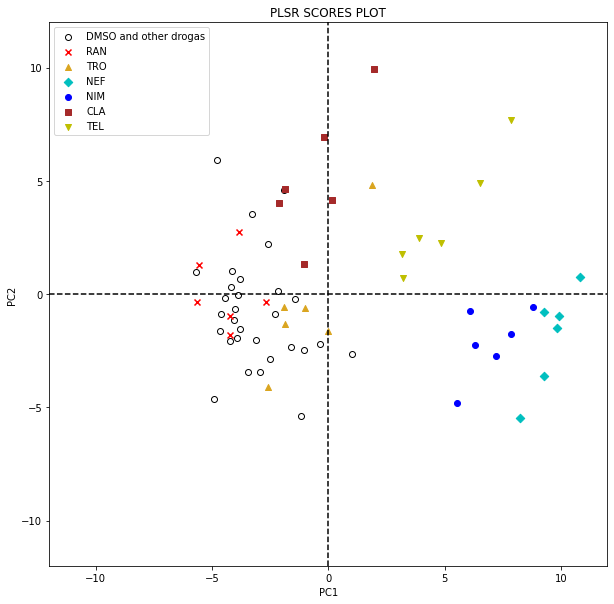

(66, 4)


In [10]:
# Answer
plsr = PLSRegression(n_components = 4)
fit = plsr.fit_transform(X1,Y1)
r2y = plsr.score(X1,Y1)
xloading, yloading = plsr.x_loadings_, plsr.y_loadings_
xscore, yscore = plsr.x_scores_, plsr.y_scores_
print(xscore.shape)

yscore1 = xscore[:,0]
yscore2 = xscore[:,1]

RANX = yscore1[12:18]
TROX = yscore1[24:30]
NEFX = yscore1[36:42]
NIMX = yscore1[48:54]
CLAX = yscore1[54:60]
TELX = yscore1[60:66]

RANY = yscore2[12:18]
TROY = yscore2[24:30]
NEFY = yscore2[36:42]
NIMY = yscore2[48:54]
CLAY = yscore2[54:60]
TELY = yscore2[60:66]

names = ['RAN', 'TRO', 'NEF', 'NIM','CLA','TEL']

remX = yscore1[np.r_[0:12,18:24,30:36,42:48]]
remY = yscore2[np.r_[0:12,18:24,30:36,42:48]]

drugY = [RANY,TROY,NEFY,NIMY,CLAY,TELY]
drugX = [RANX,TROX,NEFX,NIMX,CLAX,TELX]
marker = ['x','^','D','o','s','v']
col = ['r','goldenrod','c','b','brown','y']
print(xscore.shape)

PC1X = xscore[:,0]
PC2X = xscore[:,1]

plt.figure(figsize = (10,10))


# plt.scatter(PC1X,PC2X)
plt.scatter(remX,remY, marker = 'o', edgecolors = 'k', color = 'w', label = 'DMSO and other drogas')
for i in range(len(drugX)):
    plt.scatter(drugX[i],drugY[i], marker = marker[i], color = col[i], label = names[i])
plt.legend()
plt.axhline(y = 0, color = 'k', ls = '--')
plt.axvline(x = 0, color = 'k', ls = '--')
plt.title('PLSR SCORES PLOT')
plt.xlabel('PC1')
plt.ylabel('PC2')





plt.xlim(-12,12)
plt.ylim(-12,12)

plt.show()
print(yscore.shape)

#### (4) Create the loadings plot corresponding to (). Interpret the results shown on the plot.

Text(0, 0.5, 'PC2')

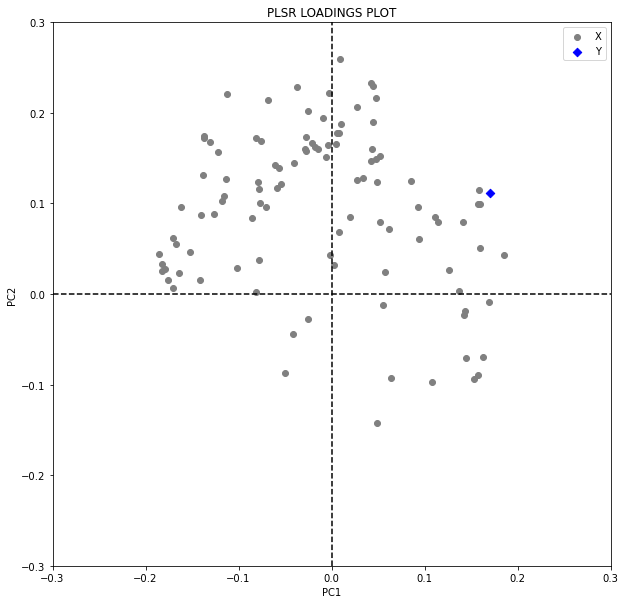

In [4]:
# Answer


plt.figure(figsize = (10,10))
plt.axhline(y = 0, color = 'k', ls = '--')
plt.axvline(x = 0, color = 'k', ls = '--')


plt.scatter(xloading[:,0],xloading[:,1],color = 'grey', label = 'X')
plt.scatter(yloading[:,0],yloading[:,1],color = 'blue', marker = 'D', label = 'Y')
plt.xlim(-0.3,0.3)
plt.ylim(-0.3,0.3)
plt.legend()
plt.title('PLSR LOADINGS PLOT')
plt.xlabel('PC1')
plt.ylabel('PC2')


The features/variables/columns that are going toexpress the most Y are the ones that are positive in both PC1 and PC2 (as shown).

#### (5) Add the variance of the loadings to your loadings plot (this can be shown as error bars). How does the variance of component one compare to that of component two? Would you expect a trend in the general variance versus component number?


1. Initialize to store all values
2. Bootstrap
3. Quartiles for each row (66)
4. Plt error bars

In [5]:
# Answer.

xLoadList1 = np.zeros(shape=(102,1000))
yLoadList1 = np.zeros(shape=(1,1000))
xLoadList2 = np.zeros(shape=(102,1000))
yLoadList2 = np.zeros(shape=(1,1000))




for bootstrapi in range(1000):
    resamp = resample(range(66))
    resX = X1[resamp,:]
    resY = Y1[resamp]
    plsr = PLSRegression(n_components = 4)

    fit = plsr.fit_transform(resX,resY)
    r2y = plsr.score(resX,resY)
    xLoadList1[:,bootstrapi] = (plsr.x_loadings_[:,0])
    xLoadList2[:,bootstrapi] = (plsr.x_loadings_[:,1])
    yLoadList1[:,bootstrapi] = (plsr.y_loadings_[:,0])
    yLoadList2[:,bootstrapi] = (plsr.y_loadings_[:,1])



In [6]:
xLoad1Q = np.zeros(shape = (102,3))
xLoad2Q = np.zeros(shape = (102,3))
yLoad1Q = np.zeros(shape = (1,3))
yLoad2Q = np.zeros(shape = (1,3))

for i in range(102):
    xLoad1Q[i,0] = -np.percentile(xLoadList1[i,:],25)+np.median(xLoadList1[i,:])
    xLoad1Q[i,1] = np.percentile(xLoadList1[i,:],75)-+np.median(xLoadList1[i,:])
    xLoad1Q[i,2] = np.median(xLoadList1[i,:])
    
    xLoad2Q[i,0] = -np.percentile(xLoadList2[i,:],25)+np.median(xLoadList2[i,:])
    xLoad2Q[i,1] = np.percentile(xLoadList2[i,:],75)-np.median(xLoadList2[i,:])
    xLoad2Q[i,2] = np.median(xLoadList2[i,:])


yLoad1Q[0,0] = -np.percentile(yLoadList1,25)+np.median(yLoadList1[0,:])
yLoad1Q[0,1] = np.percentile(yLoadList1,75)-np.median(yLoadList1[0,:])
yLoad1Q[0,2] = np.median(yLoadList1[0,:])

yLoad2Q[0,0] = -np.percentile(yLoadList2,25)+np.median(yLoadList2[0,:])
yLoad2Q[0,1] = np.percentile(yLoadList2,75)-np.median(yLoadList2[0,:])
yLoad2Q[0,2] = np.median(yLoadList2[0,:])


print(yLoad1Q)


[[0.01393385 0.00790298 0.16765592]]


Text(0, 0.5, 'PC2')

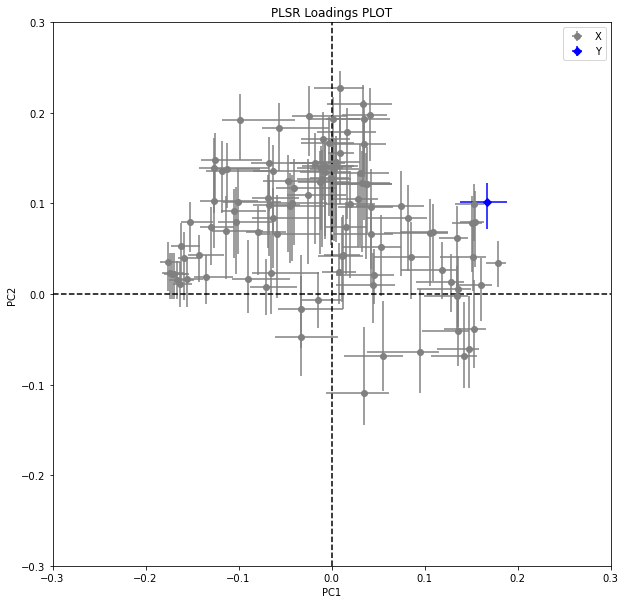

In [7]:

plt.figure(figsize = (10,10))
plt.axhline(y = 0, color = 'k', ls = '--')
plt.axvline(x = 0, color = 'k', ls = '--')



plt.xlim(-0.3,0.3)
plt.ylim(-0.3,0.3)


plt.errorbar(xLoad1Q[:,2],xLoad2Q[:,2],xerr = (xLoad1Q[:,0],xLoad1Q[:,1]), yerr = (xLoad2Q[:,0], xLoad2Q[:,1]), fmt = 'o',color = 'grey', label = 'X')
plt.errorbar(yLoad1Q[:,2],yLoad2Q[:,2],xerr = (yLoad2Q[:,0],yLoad2Q[:,1]), yerr = (yLoad2Q[:,0],yLoad2Q[:,1]), fmt = 'o',color = 'b',marker = 'D', label = 'Y')

plt.xlim(-0.3,0.3)
plt.ylim(-0.3,0.3)
plt.legend()
plt.title('PLSR Loadings PLOT')
plt.xlabel('PC1')
plt.ylabel('PC2')




Looking at the PLSR scores plot, there are a lot more variance in the vertical direction, so PC2. Also calculating mathematically, the mean of the variance of the error bars for PC2 is higher than PC1. While in PCA we would expect variance explained to go down as component # increase, since PCA solely focuses on variance. In PLSR we are looking at covariance which may not necessarily demonstrate the same kind of trend for the variances for the model.

#### (6) Recreate a 4-principal component model using PLSR with just the final 4 phosphoprotein model. Plot predicted v. observed LDH for this model. Report the model fitness ($R^2$). Define here how you are calculating $R^2$.

0.8821898904528919
1.0


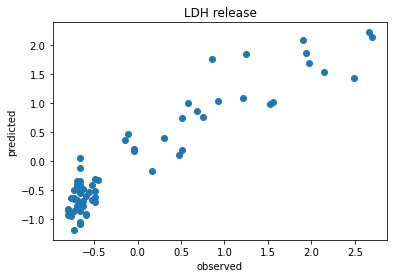

In [8]:
# Answer

x_f4 = X1[:,ind4pProtein]
plsr4 = PLSRegression(n_components = 4)
plsr4.fit(x_f4,Y1)
plsr4.score(x_f4, Y1)
Yq6 = plsr4.predict(x_f4)
r2y = plsr4.score(x_f4,Yq6)
plt.plot(Y1,Yq6,'o')
plt.xlabel('observed')
plt.ylabel('predicted')
plt.title('LDH release')

modelfitneses = plsr4.score(x_f4, Y1)

print(modelfitneses)
print(r2y);

#use ind4 protein use all thsoe indices

The model fitness is .882. 

Shown in a later question, R^2 is calculated by 1 - (summation(Y_predict - Y_obs)^2/summation(Y_obs)^2)

#### (7) Cosgrove *et al* discusses their method for model validation using leave-one-out cross-validation. Calculate all LDH predictions for leave-one-out cross-validation and calculate the R^2 value for the resulting yfit values. What is the R^2 value? Why do you think it’s important to perform cross-validation?

In [9]:
# Answer
y_pred = np.empty_like(Y1)
LOOCV = LeaveOneOut()

for train, test in LOOCV.split(X1):
    plsr = PLSRegression(n_components = 4)
    fit = plsr.fit_transform(X1[train],Y1[train])
    y_pred[test] = plsr.predict(X1[test])


summation1 = 0
summation2 = 0
for i in range(66):
    summation1 += (y_pred[i]-Y1[i])**2
    summation2 += (Y1[i])**2

    
R2Y = 1-summation1/summation2

print('R2 value is ' + str(R2Y))


R2 value is 0.847813385573984


R^2 value is 0.847813, it is important to perform cross validation as it will overestimate the prediction error by not training with the whole data set. It improves the model as it can actually be tested

#### (8) Now, instead of performing LOOCV, let's perform leave-one-cytokine-out cross-validation. That is, one cytokine at a time, leave out all the data for the `NoCyt`, `IL-1`, `LPS`, `TNF`, `IL-6`, or `Mix` conditions.

Hint: Look at `sklearn.model_selection.LeaveOneGroupOut`.

How does this affect your cross-validation? How do the two approaches here differ? When might each be most appropriate?

In [10]:
# Answer
cytokineList

y_pred = np.empty(shape = (66,1))
LOGO = LeaveOneGroupOut()


groups = np.tile(np.arange(1,7),11)
for train, test in LOGO.split(X1,Y1, groups):
    plsr = PLSRegression(n_components = 4)
    fit = plsr.fit_transform(X1[train],Y1[train])
    y_pred[test] = plsr.predict(X1[test])


summation1 = 0
summation2 = 0
for i in range(66):
    summation1 += (y_pred[i]-Y1[i])**2
    summation2 += (Y1[i])**2

    
R2Y = 1-summation1/summation2
print("R2 is " + str(R2Y))


R2 is [0.86242709]


We are only leaving out one index each time to get tested for LOOCV whereeas for LOGO, we are pulling out groups or multiple indices to be tested thus reducing our training set size. Otherwise, they both perform the same process. It may depend on the data set and it may also show if some variables are dependent or related on each other shown by a different or particular R2Y. LOOCV is more appropriate when there are no additional groupings to be had for each sample (they are all unique and not related). Otherwise, if there are some sort of similarities, grouping does make sensee.